In [105]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("processed_zone_features.csv")  

In [75]:
def split_water_levels(water_str):
    try:
        low, high = water_str.split('-')
        return float(low), float(high)
    except:
        return None, None 

df[["WaterLevel_Min", "WaterLevel_Max"]] = df["Water Levels"].apply(lambda x: pd.Series(split_water_levels(x)))

In [76]:
df = df.drop(columns=["Water Levels","Zone", "ForestName"])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lat                          52 non-null     float64
 1   Long                         52 non-null     float64
 2   DistanceToForest             52 non-null     float64
 3   UrbanGrowth                  52 non-null     float64
 4   LanduseChange                52 non-null     float64
 5   ForestLat                    52 non-null     float64
 6   ForestLon                    52 non-null     float64
 7   NO2_Mine                     52 non-null     float64
 8   NO2_Forest                   52 non-null     float64
 9   WaterLevel_Mean              52 non-null     float64
 10  WaterLevel_Range             52 non-null     float64
 11  NO2_Mine_Forest_Ratio        52 non-null     float64
 12  NO2_Differential             52 non-null     float64
 13  Environmental_Stress  

In [78]:
df.describe()

,Lat,Long,DistanceToForest,UrbanGrowth,LanduseChange,ForestLat,ForestLon,NO2_Mine,NO2_Forest,WaterLevel_Mean,WaterLevel_Range,NO2_Mine_Forest_Ratio,NO2_Differential,Environmental_Stress,Water_Pollution_Interaction,Risk,WaterLevel_Min,WaterLevel_Max
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,21.812594,82.454181,0.913994,0.015937,0.570134,22.179400,82.423375,0.000099,0.000077,6.003654,6.657308,1.256309,0.000022,0.290610,0.000581,502.846154,3.069038,11.386731
std,5.010158,5.029206,3.551368,0.038367,0.391456,5.034303,5.073846,0.000050,0.000014,4.586669,4.317476,0.456884,0.000043,0.146988,0.000463,505.459193,3.162236,6.864510
min,8.077222,70.366944,0.000029,-0.073201,0.007565,8.451857,70.103920,0.000049,0.000049,3.075000,0.870000,0.771930,-0.000026,0.111073,0.000197,4.000000,0.900000,4.850000
25%,19.664584,79.269652,0.000479,-0.003310,0.301994,20.096935,79.214114,0.000068,0.000066,4.122500,4.702500,0.986103,-0.000001,0.182337,0.000364,83.500000,1.427500,6.312500
50%,22.500000,82.674722,0.007185,0.002934,0.507990,22.909809,82.776590,0.000082,0.000077,4.515000,5.645000,1.065476,0.000005,0.250711,0.000420,327.000000,2.540000,9.150000
75%,24.185486,85.592497,0.071863,0.022382,0.701144,24.565996,85.611636,0.000103,0.000086,5.816250,6.317500,1.322581,0.000025,0.335736,0.000618,678.000000,3.400000,16.240000
max,33.155556,95.849998,23.185505,0.147533,1.876897,33.536906,95.831209,0.000277,0.000114,30.180000,30.540000,2.742574,0.000176,0.666667,0.002653,1906.000000,22.880000,37.560000


In [79]:
df["Risk"].describe()

count      52.000000
mean      502.846154
std       505.459193
min         4.000000
25%        83.500000
50%       327.000000
75%       678.000000
max      1906.000000
Name: Risk, dtype: float64

<Axes: >

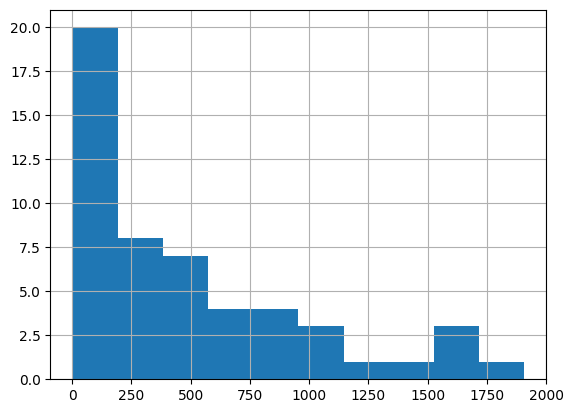

In [80]:
df["Risk"].hist()

In [81]:
X = df.drop(columns=["Risk"])
y = df["Risk"]

In [82]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test MSE: {rmse:.4f}")

Test MSE: 356.7365


# Part 2

In [123]:
import pandas as pd
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

In [124]:
df = pd.read_csv("processed_zone_features.csv")  


In [125]:
def split_water_levels(s):
    try:
        lo, hi = s.split('-')
        return float(lo), float(hi)
    except Exception:
        return None, None     

df[["WaterLevel_Min", "WaterLevel_Max"]] = (
    df["Water Levels"].apply(lambda x: pd.Series(split_water_levels(x)))
)

In [126]:
df = df.drop(columns=["Zone", "ForestName", "Water Levels"])

In [127]:
X = df.drop(columns=["Risk"])
y = df["Risk"]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [133]:
y_log = np.log1p(y_train)

In [134]:
cat_model = CatBoostRegressor(
    iterations=100,
    depth=2,
    learning_rate=0.05,
    l2_leaf_reg=5.0,
    verbose=False
)
cat_model.fit(X_train, y_train)

In [135]:
y_pred = cat_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 240.33


In [116]:
net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
net_model.fit(X_train, y_train)


ElasticNet()

In [97]:
y_pred = net_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 362.54


In [99]:
KNNmodel = KNeighborsRegressor(n_neighbors=3)
KNNmodel.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [100]:
y_pred = KNNmodel.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 588.94


In [102]:
lgbmmodel = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.05)
lgbmmodel.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 46, number of used features: 14
[LightGBM] [Info] Start training from score 508.282609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(learning_rate=0.05, max_depth=3)

In [103]:
y_pred = lgbmmodel.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 300.71
